In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('veriseti_duzenli.csv')

In [4]:
df

,Id,Yas,Cinsiyet,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,Sigara,Alkol,FizikselAktivite,KardiyoVasküler,VKI
0,988,61,Kadin,1.55,69.000000,130.0,80,1,2,Hayir,Hayir,Aktif,Yok,28.720083
1,989,40,Kadin,1.63,71.000000,110.0,70,1,1,Hayir,Hayir,Aktif,Var,26.722873
2,990,60,Kadin,1.65,70.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Yok,25.711662
3,991,39,Erkek,1.65,85.000000,120.0,80,1,1,Evet,Evet,Aktif,Yok,31.221304
4,992,64,Kadin,1.55,62.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Yok,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,52,Erkek,1.68,76.000000,120.0,80,1,1,Evet,Hayir,Aktif,Yok,26.927438
69297,99995,61,Kadin,1.58,126.000000,140.0,90,2,2,Hayir,Hayir,Aktif,Var,50.472681
69298,99996,52,Erkek,1.83,105.000000,180.0,90,3,1,Hayir,Evet,Pasif,Var,31.353579
69299,99998,61,Kadin,1.63,72.000000,135.0,80,1,2,Hayir,Hayir,Pasif,Var,27.099251


In [5]:
#ıd değişkeni hastalık durumunu etkilemediği için silinmiştir
df=df.drop('Id', axis=1)
df

,Yas,Cinsiyet,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,Sigara,Alkol,FizikselAktivite,KardiyoVasküler,VKI
0,61,Kadin,1.55,69.000000,130.0,80,1,2,Hayir,Hayir,Aktif,Yok,28.720083
1,40,Kadin,1.63,71.000000,110.0,70,1,1,Hayir,Hayir,Aktif,Var,26.722873
2,60,Kadin,1.65,70.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Yok,25.711662
3,39,Erkek,1.65,85.000000,120.0,80,1,1,Evet,Evet,Aktif,Yok,31.221304
4,64,Kadin,1.55,62.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Yok,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52,Erkek,1.68,76.000000,120.0,80,1,1,Evet,Hayir,Aktif,Yok,26.927438
69297,61,Kadin,1.58,126.000000,140.0,90,2,2,Hayir,Hayir,Aktif,Var,50.472681
69298,52,Erkek,1.83,105.000000,180.0,90,3,1,Hayir,Evet,Pasif,Var,31.353579
69299,61,Kadin,1.63,72.000000,135.0,80,1,2,Hayir,Hayir,Pasif,Var,27.099251


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Yas                   69301 non-null  int64  
 1   Cinsiyet              69301 non-null  object 
 2   Boy                   69301 non-null  float64
 3   Agirlik               69301 non-null  float64
 4   SistolikKanBasinci    69301 non-null  float64
 5   DiyastolikKanBasinci  69301 non-null  int64  
 6   Kolestrol             69301 non-null  int64  
 7   Glikoz                69301 non-null  int64  
 8   Sigara                69301 non-null  object 
 9   Alkol                 69301 non-null  object 
 10  FizikselAktivite      69301 non-null  object 
 11  KardiyoVasküler       69301 non-null  object 
 12  VKI                   69301 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 6.9+ MB


In [7]:
df["KardiyoVasküler"].value_counts()

KardiyoVasküler
Yok    34679
Var    34622
Name: count, dtype: int64

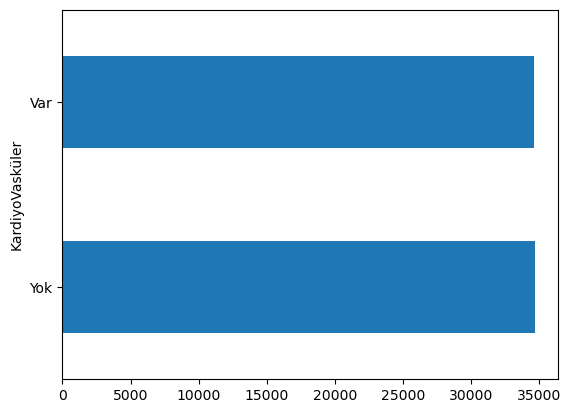

In [8]:
df["KardiyoVasküler"].value_counts().plot.barh();

In [10]:
df["Cinsiyet"].value_counts()

Cinsiyet
Kadin    45079
Erkek    24222
Name: count, dtype: int64

In [11]:
df["Sigara"].value_counts()

Sigara
Hayir    63199
Evet      6102
Name: count, dtype: int64

In [12]:
df["Alkol"].value_counts()

Alkol
Hayir    65567
Evet      3734
Name: count, dtype: int64

In [13]:
df["FizikselAktivite"].value_counts()

FizikselAktivite
Aktif    55720
Pasif    13581
Name: count, dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yas,69301.0,52.839945,6.766592,29.000000,48.000000,53.000000,58.000000,64.000000
Boy,69301.0,1.643622,0.082053,0.550000,1.590000,1.650000,1.700000,2.500000
Agirlik,69301.0,74.203948,14.382661,10.000000,65.000000,72.000000,82.000000,200.000000
SistolikKanBasinci,69301.0,128.830738,154.775749,-150.000000,120.000000,120.000000,140.000000,16020.000000
DiyastolikKanBasinci,69301.0,96.649962,189.096251,-70.000000,80.000000,80.000000,90.000000,11000.000000
Kolestrol,69301.0,1.366777,0.680265,1.000000,1.000000,1.000000,2.000000,3.000000
Glikoz,69301.0,1.226447,0.572246,1.000000,1.000000,1.000000,1.000000,3.000000
VKI,69301.0,27.555120,6.091905,3.471784,23.875115,26.370238,30.222222,298.666667


## One-Hot Dönüşümü

In [15]:
#Kategorik değişkenler için one hot dönüşümü gerçekleştirdik
dms = pd.get_dummies(df[['Cinsiyet','Sigara', 'Alkol', 'FizikselAktivite','KardiyoVasküler']])
dms=dms.astype(int)
dms.head()

,Cinsiyet_Erkek,Cinsiyet_Kadin,Sigara_Evet,Sigara_Hayir,Alkol_Evet,Alkol_Hayir,FizikselAktivite_Aktif,FizikselAktivite_Pasif,KardiyoVasküler_Var,KardiyoVasküler_Yok
0,0,1,0,1,0,1,1,0,0,1
1,0,1,0,1,0,1,1,0,1,0
2,0,1,0,1,0,1,1,0,0,1
3,1,0,1,0,1,0,1,0,0,1
4,0,1,0,1,0,1,1,0,0,1


In [16]:
#dummy tuzağına yakalandığımız için bu durumu ortadan bu şekilde kaldırmamız gerekiyor
dms = pd.get_dummies(df[['Cinsiyet','Sigara', 'Alkol', 'FizikselAktivite','KardiyoVasküler']], drop_first=True)
dms=dms.astype(int)
dms.head()

,Cinsiyet_Kadin,Sigara_Hayir,Alkol_Hayir,FizikselAktivite_Pasif,KardiyoVasküler_Yok
0,1,1,1,0,1
1,1,1,1,0,0
2,1,1,1,0,1
3,0,0,0,0,1
4,1,1,1,0,1


In [17]:
#Hedef (bağımlı) değişkeni y 'ye atadık
y = df["KardiyoVasküler"]

In [18]:
y

0        Yok
1        Var
2        Yok
3        Yok
4        Yok
        ... 
69296    Yok
69297    Var
69298    Var
69299    Var
69300    Yok
Name: KardiyoVasküler, Length: 69301, dtype: object

In [19]:
#Bağımsız değişkenleri X'e atadık
X_ = df.drop(['Cinsiyet','Sigara', 'Alkol', 'FizikselAktivite','KardiyoVasküler'], axis = 1).astype("float64","int64")

In [20]:
X_['Kolestrol'] = X_['Kolestrol'].astype('int64')
X_['Yas'] = X_['Yas'].astype('int64')
X_['Glikoz'] = X_['Glikoz'].astype('int64')

In [21]:
X_

,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,VKI
0,61,1.55,69.000000,130.0,80.0,1,2,28.720083
1,40,1.63,71.000000,110.0,70.0,1,1,26.722873
2,60,1.65,70.000000,120.0,80.0,1,1,25.711662
3,39,1.65,85.000000,120.0,80.0,1,1,31.221304
4,64,1.55,62.000000,120.0,80.0,1,1,25.806452
...,...,...,...,...,...,...,...,...
69296,52,1.68,76.000000,120.0,80.0,1,1,26.927438
69297,61,1.58,126.000000,140.0,90.0,2,2,50.472681
69298,52,1.83,105.000000,180.0,90.0,3,1,31.353579
69299,61,1.63,72.000000,135.0,80.0,1,2,27.099251


In [22]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Yas                   69301 non-null  int64  
 1   Boy                   69301 non-null  float64
 2   Agirlik               69301 non-null  float64
 3   SistolikKanBasinci    69301 non-null  float64
 4   DiyastolikKanBasinci  69301 non-null  float64
 5   Kolestrol             69301 non-null  int64  
 6   Glikoz                69301 non-null  int64  
 7   VKI                   69301 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 4.2 MB


In [23]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
X.head()

,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,VKI,Cinsiyet_Kadin,Sigara_Hayir,Alkol_Hayir,FizikselAktivite_Pasif,KardiyoVasküler_Yok
0,61,1.55,69.0,130.0,80.0,1,2,28.720083,1,1,1,0,1
1,40,1.63,71.0,110.0,70.0,1,1,26.722873,1,1,1,0,0
2,60,1.65,70.0,120.0,80.0,1,1,25.711662,1,1,1,0,1
3,39,1.65,85.0,120.0,80.0,1,1,31.221304,0,0,0,0,1
4,64,1.55,62.0,120.0,80.0,1,1,25.806452,1,1,1,0,1


In [24]:
#bağımlı değişkeni y ye atayıp bağımsız değişkenleri içeren X değişkeninden bağımlı değikeni siliyoruz
y = X["KardiyoVasküler_Yok"]
X = X.drop(["KardiyoVasküler_Yok"], axis=1)

In [25]:
X

,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,VKI,Cinsiyet_Kadin,Sigara_Hayir,Alkol_Hayir,FizikselAktivite_Pasif
0,61,1.55,69.000000,130.0,80.0,1,2,28.720083,1,1,1,0
1,40,1.63,71.000000,110.0,70.0,1,1,26.722873,1,1,1,0
2,60,1.65,70.000000,120.0,80.0,1,1,25.711662,1,1,1,0
3,39,1.65,85.000000,120.0,80.0,1,1,31.221304,0,0,0,0
4,64,1.55,62.000000,120.0,80.0,1,1,25.806452,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52,1.68,76.000000,120.0,80.0,1,1,26.927438,0,0,1,0
69297,61,1.58,126.000000,140.0,90.0,2,2,50.472681,1,1,1,0
69298,52,1.83,105.000000,180.0,90.0,3,1,31.353579,0,1,0,1
69299,61,1.63,72.000000,135.0,80.0,1,2,27.099251,1,1,1,1


# KNN

## Model & Tahmin

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [27]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [28]:
y_pred = knn_model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.6936655283536145

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69     10419
           1       0.68      0.71      0.70     10372

    accuracy                           0.69     20791
   macro avg       0.69      0.69      0.69     20791
weighted avg       0.69      0.69      0.69     20791



## Model Tuning

In [31]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [32]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [34]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5).fit(X_train, y_train)

In [35]:
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi parametreler: {'n_neighbors': 37}


In [36]:
knn = KNeighborsClassifier(37)
knn_tuned = knn.fit(X_train, y_train)

In [37]:
y_pred = knn_tuned.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.7183877639363186

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     10419
           1       0.70      0.77      0.73     10372

    accuracy                           0.72     20791
   macro avg       0.72      0.72      0.72     20791
weighted avg       0.72      0.72      0.72     20791



# Yapay Sinir Ağları

## Model & Tahmin


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [41]:
#Yapay sinir ağları değişkenlerin ölçekleri ve birbirlerinden farklılıklarından etkilenir, bu nedenle standartlaştırma işlemi yapıyoruz.

In [42]:
from sklearn.preprocessing import StandardScaler  

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.neural_network import MLPClassifier

In [46]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [47]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7326246933769419

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     10419
           1       0.72      0.77      0.74     10372

    accuracy                           0.73     20791
   macro avg       0.73      0.73      0.73     20791
weighted avg       0.73      0.73      0.73     20791



## Model Tuning

In [49]:
mlpc.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [51]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "max_iter": [-1,10,100],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
#solver: ağırlık optimizasyon yöntemi. Büyük veri setlerinde daha çok kabul edilen ağırlık optimizasyon yöntemidir. Bizim elimizdeki veri çok karmaşık ve büyük değilse belki farklı bir ağırlık optimizasyon yöntemi bizim için daha iyidir.
#hidden_layer_sizes (gizli katman) kaç katmandan ve nörondan oluşacak bilgisini verir. Her katman için nöron sayısını girerek kaç katmnadan oluşacağını da bildirmiş oluruz.
#activation fonksiyonu ön tanımlı değeri relu dur biz bir de logistic (sigmoid) fonksiyonunu deneyelim
#alpha; düzenleştirme parametresidir. Ön tanımlı değeri 0.0001 miş

In [52]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, 
                         n_jobs = -1,
                         verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [53]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 100, 'solver': 'lbfgs'}


In [56]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.02, 
                           hidden_layer_sizes = (10, 10, 10),
                           max_iter=100,
                          solver = "lbfgs")

In [57]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.02, hidden_layer_sizes=(10, 10, 10), max_iter=100,
              solver='lbfgs')

In [58]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7336828435380693

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72     10419
           1       0.71      0.78      0.75     10372

    accuracy                           0.73     20791
   macro avg       0.74      0.73      0.73     20791
weighted avg       0.74      0.73      0.73     20791



# CART

## Model & Tahmin

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [80]:
cart_model

DecisionTreeClassifier()

In [81]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.632244721273628

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63     10419
           1       0.63      0.63      0.63     10372

    accuracy                           0.63     20791
   macro avg       0.63      0.63      0.63     20791
weighted avg       0.63      0.63      0.63     20791



## Model Tuning

In [83]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [84]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

#maxdepth: ağacın derinliği bilgisi, ağacın karmaşıklığını dallanmaları kontrol etmek için kullanılan bir parametre
#Ağacın maksimum derinliği. 
#Hiçbiri yoksa, düğümler tüm yapraklar saf olana kadar veya tüm yapraklar min_samples_split'ten daha az örnek içerene kadar genişletilir.
#dallanma dolayısıyla overfitting önüne geçmek için kullanılır

#min_samples_split; Bölünme için gerekli olan minimum örnek sayısı. Bir bölünme gerçekleşti, tekrar bölünme gerçekleşip gerçekleşmeyeceğini belirlemek için kullanılan bir argüman.

In [86]:
cart = DecisionTreeClassifier()
cart_cv_model = GridSearchCV(cart, cart_grid, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [87]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 7, 'min_samples_split': 41}


In [88]:
cart = DecisionTreeClassifier(max_depth = 7, min_samples_split = 41)
cart_tuned = cart.fit(X_train, y_train)

In [89]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7297869270357367

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     10419
           1       0.71      0.77      0.74     10372

    accuracy                           0.73     20791
   macro avg       0.73      0.73      0.73     20791
weighted avg       0.73      0.73      0.73     20791



# XGBoost

## Model & Tahmin

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [62]:
!pip install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [63]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [64]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.731662738685008

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     10419
           1       0.71      0.77      0.74     10372

    accuracy                           0.73     20791
   macro avg       0.73      0.73      0.73     20791
weighted avg       0.73      0.73      0.73     20791



## Model Tuning

In [67]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [68]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

#'subsample'; Eğitim örneğinin alt örnek oranı. 

In [69]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


In [70]:
print("En iyi parametreler: " + str(xgb_cv_model.best_params_))

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


In [71]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [72]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [73]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7362320234716945

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72     10419
           1       0.72      0.78      0.75     10372

    accuracy                           0.74     20791
   macro avg       0.74      0.74      0.74     20791
weighted avg       0.74      0.74      0.74     20791



# Tüm Modellerin Karşılaştırılması

In [91]:
modeller = [
    knn_tuned,
    mlpc_tuned,
    cart_tuned,
    xgb_tuned
]


for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*25)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

-------------------------
KNeighborsClassifier:
Accuracy: 71.8388%
-------------------------
MLPClassifier:
Accuracy: 73.3683%
-------------------------
DecisionTreeClassifier:
Accuracy: 72.9787%
-------------------------
XGBClassifier:
Accuracy: 73.6232%


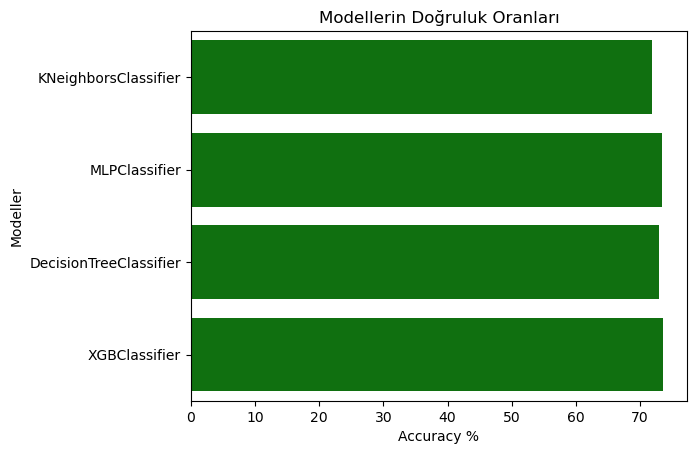

In [93]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)
    #sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="g")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');  